# https://github.com/MorvanZhou/PyTorch-Tutorial/tree/master/tutorial-contents

In [2]:
import torch
import numpy as np

## Tensor

In [3]:
# convert numpy to tensor or vise versa
np_data = np.arange(6).reshape((2,3))
torch_data = torch.from_numpy(np_data)
tensor2array = torch_data.numpy()

In [4]:
np_data

array([[0, 1, 2],
       [3, 4, 5]])

In [5]:
torch_data

tensor([[ 0,  1,  2],
        [ 3,  4,  5]])

In [6]:
tensor2array

array([[0, 1, 2],
       [3, 4, 5]])

-------------

In [7]:
# abs
data = [-1, -2, 1, 2]
tensor = torch.FloatTensor(data)

In [8]:
print(np.abs(data))
print('---')
print(torch.abs(tensor))

[1 2 1 2]
---
tensor([ 1.,  2.,  1.,  2.])


In [9]:
print(np.sin(data))
print('---')
print(torch.sin(tensor))

[-0.84147098 -0.90929743  0.84147098  0.90929743]
---
tensor([-0.8415, -0.9093,  0.8415,  0.9093])


In [10]:
print(np.mean(np_data,axis=-1))
print('---')
print(torch.mean(torch_data, dim=-1))

[1. 4.]
---


RuntimeError: mean is not implemented for type torch.LongTensor

In [11]:
print torch_data.type()
print tensor.type()

torch.LongTensor
torch.FloatTensor


In [12]:
torch_data.type_as(tensor)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.]])

In [13]:
print(np.mean(np_data,axis=-1))
print('---')
print(torch.mean(torch_data.type_as(tensor),dim=-1))

[1. 4.]
---
tensor([ 1.,  4.])


----------------

In [14]:
# matrix multiplication
data = [[1,2], [3,4]]
tensor = torch.FloatTensor(data) 

In [15]:
# correct method
print(np.matmul(data,data))
print('---')
print(torch.mm(tensor,tensor))

[[ 7 10]
 [15 22]]
---
tensor([[  7.,  10.],
        [ 15.,  22.]])


In [16]:
# incorrect method
data = np.array(data)
print(data.dot(data))
print('---')
print(tensor.dot(tensor))

[[ 7 10]
 [15 22]]
---


RuntimeError: Expected argument self to have 1 dimension, but has 2

----------------------

## Autograd / Variable

In [17]:
from torch.autograd import Variable

In [18]:
tensor = torch.FloatTensor([[1,2],[3,4]]) # build a tensor
variable = Variable(tensor, requires_grad=True)  # build a variable, usually for compute gradients

In [19]:
print(tensor)   
print('------')
print(variable)

tensor([[ 1.,  2.],
        [ 3.,  4.]])
------
tensor([[ 1.,  2.],
        [ 3.,  4.]])


In [20]:
# till now the tensor and variable seem the same.
# However, the variable is a part of the graph, it's a part of the auto-gradient.

In [21]:
t_out = torch.mean(tensor*tensor)       # x^2
v_out = torch.mean(variable*variable)   # x^2

In [22]:
print(t_out)
print(v_out) 

tensor(7.5000)
tensor(7.5000)


In [23]:
# v_out = 1/4 * sum(variable*variable)
# the gradients w.r.t the variable, d(v_out)/d(variable) = 1/4*2*variable = variable/2

In [24]:
v_out.backward() # backpropagation from v_out

In [25]:
print(variable.grad)

tensor([[ 0.5000,  1.0000],
        [ 1.5000,  2.0000]])


In [26]:
print(variable) # this is data in variable format

tensor([[ 1.,  2.],
        [ 3.,  4.]])


In [27]:
print(variable.data) # this is data in tensor format

tensor([[ 1.,  2.],
        [ 3.,  4.]])


In [28]:
print(variable.data.numpy()) # numpy format

[[1. 2.]
 [3. 4.]]


-------------------

## Activation

In [29]:
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [30]:
# fake data
x = torch.linspace(-5, 5, 200)  # x data (tensor), shape=(100, 1)
print x.shape
x = Variable(x)
x_np = x.data.numpy() # numpy array for plotting

torch.Size([200])


In [31]:
x

tensor([-5.0000, -4.9497, -4.8995, -4.8492, -4.7990, -4.7487, -4.6985,
        -4.6482, -4.5980, -4.5477, -4.4975, -4.4472, -4.3970, -4.3467,
        -4.2965, -4.2462, -4.1960, -4.1457, -4.0955, -4.0452, -3.9950,
        -3.9447, -3.8945, -3.8442, -3.7940, -3.7437, -3.6935, -3.6432,
        -3.5930, -3.5427, -3.4925, -3.4422, -3.3920, -3.3417, -3.2915,
        -3.2412, -3.1910, -3.1407, -3.0905, -3.0402, -2.9899, -2.9397,
        -2.8894, -2.8392, -2.7889, -2.7387, -2.6884, -2.6382, -2.5879,
        -2.5377, -2.4874, -2.4372, -2.3869, -2.3367, -2.2864, -2.2362,
        -2.1859, -2.1357, -2.0854, -2.0352, -1.9849, -1.9347, -1.8844,
        -1.8342, -1.7839, -1.7337, -1.6834, -1.6332, -1.5829, -1.5327,
        -1.4824, -1.4322, -1.3819, -1.3317, -1.2814, -1.2312, -1.1809,
        -1.1307, -1.0804, -1.0302, -0.9799, -0.9296, -0.8794, -0.8291,
        -0.7789, -0.7286, -0.6784, -0.6281, -0.5779, -0.5276, -0.4774,
        -0.4271, -0.3769, -0.3266, -0.2764, -0.2261, -0.1759, -0.1256,
      

In [32]:
# following are popular activation functions
y_relu = F.relu(x).data.numpy()
y_sigmoid = F.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()
#y_softmax = F.softmax(x)  #softmax is a special kind of activation function, it is about probability

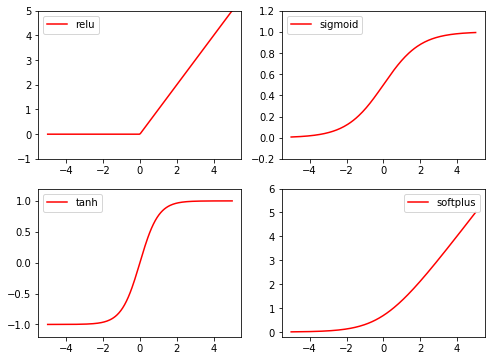

In [33]:
# plt to visualize these activation function
plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()

------------------------

## Regression

In [34]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

In [35]:
print x.shape
print y.shape

torch.Size([100, 1])
torch.Size([100, 1])


In [36]:
# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

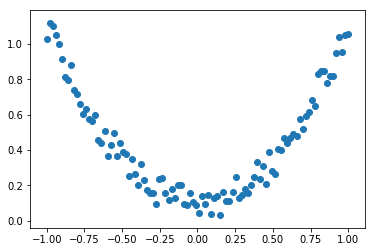

In [37]:
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [38]:
import torch
import torch.nn as nn

#### Define the network

In [39]:
class Net(nn.Module):
    def __init__(self,n_feature, n_hidden, n_output):
        super(Net,self).__init__()
        # define all the components that will be used in the NN (these can be reused)
        self.hidden = torch.nn.Linear(n_feature,n_hidden) #hidden layer
        self.predict = torch.nn.Linear(n_hidden,n_output) #output layer
    
    def forward(self,x):
        # define the acutal network
        #in_size = x.size(0) # get the batch size
        
        # chain function together to form the layers
        x = F.relu(self.hidden(x)) # activation function for hidden layer
        x = self.predict(x) # linear output
        return x

In [40]:
net = Net(n_feature=1, n_hidden=10, n_output=1) # define the network

In [41]:
print(net) # net architecture

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [42]:
net.parameters

<bound method Net.parameters of Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)>

In [43]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss() # this is for regression mean squared loss

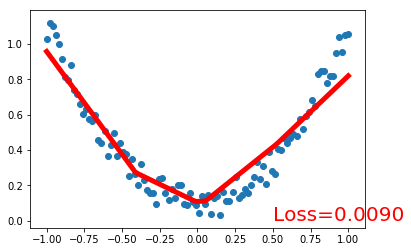

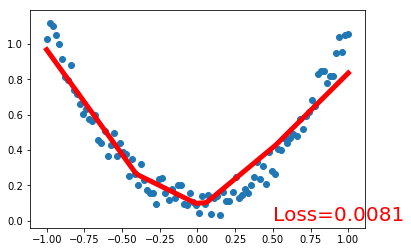

In [45]:
plt.ion()   # something about plotting

for t in range(10):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()

-------------------

## Classification

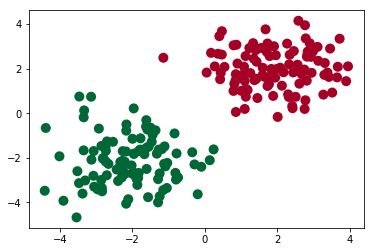

In [130]:
# make fake data
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)      # class0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # class0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)     # class1 x data (tensor), shape=(100, 2)
y1 = torch.ones(100)                # class1 y data (tensor), shape=(100, 1)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # shape (200,) LongTensor = 64-bit integer


x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


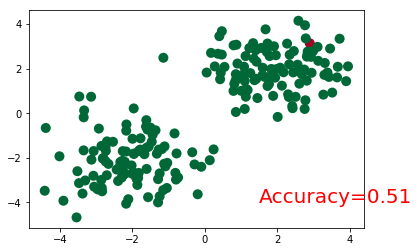

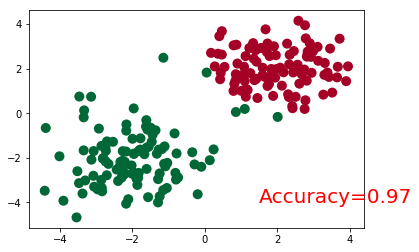

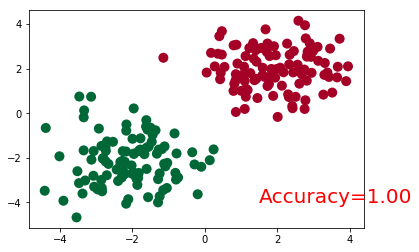

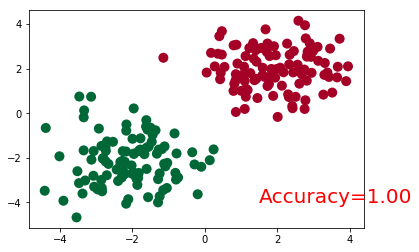

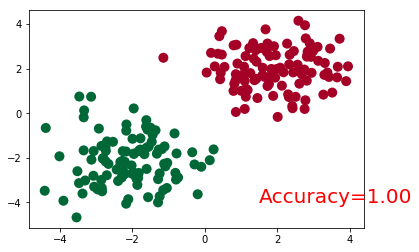

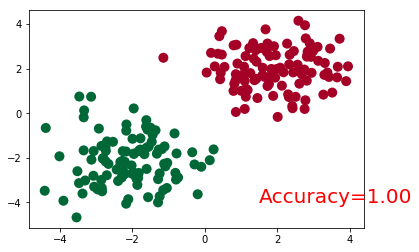

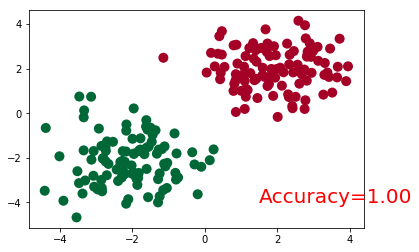

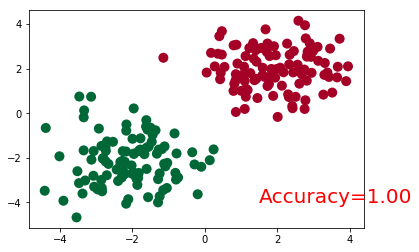

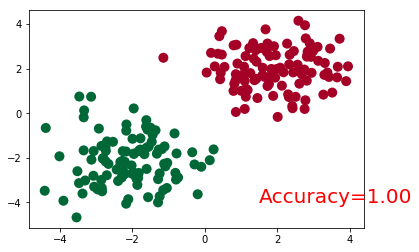

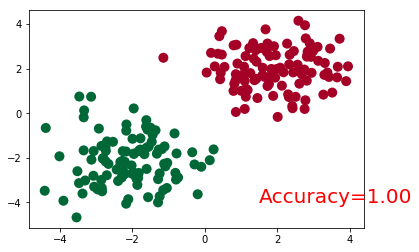

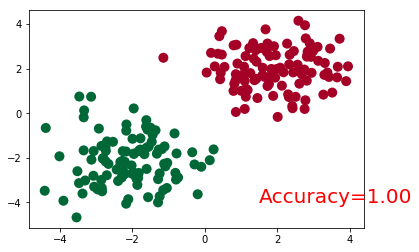

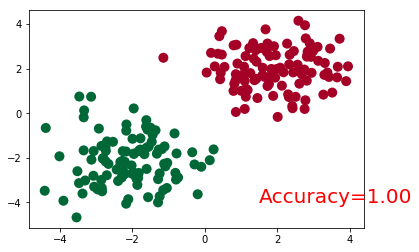

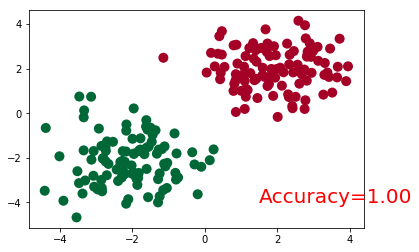

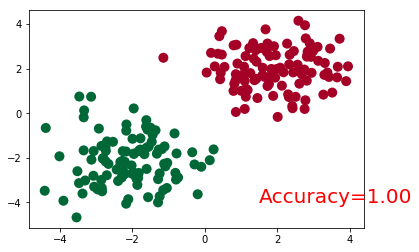

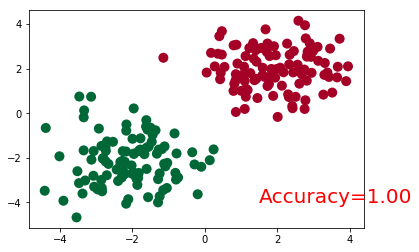

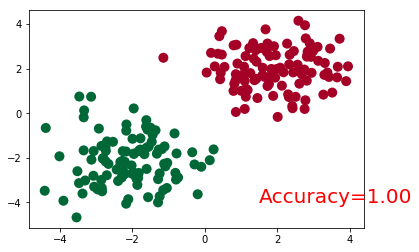

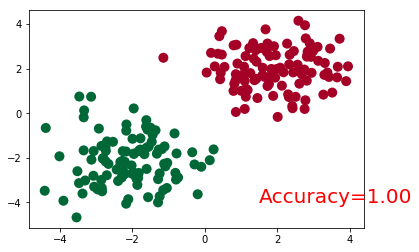

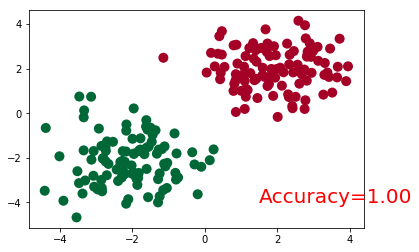

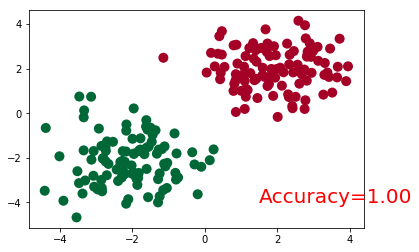

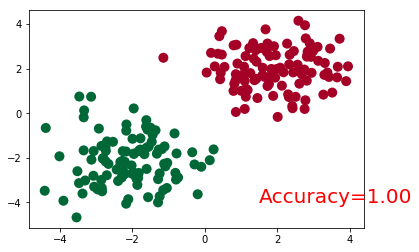

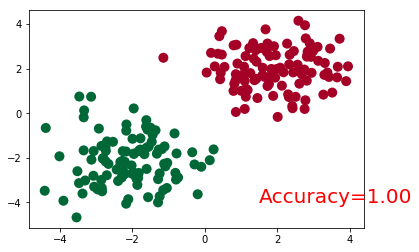

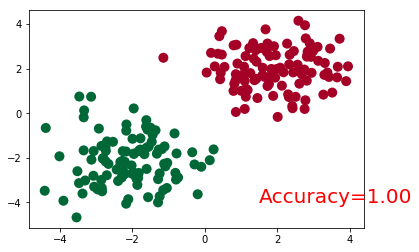

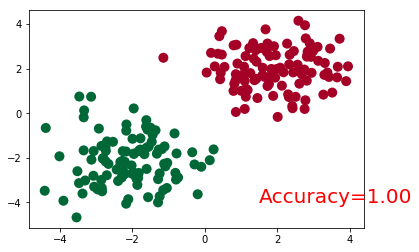

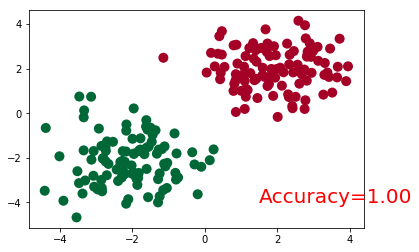

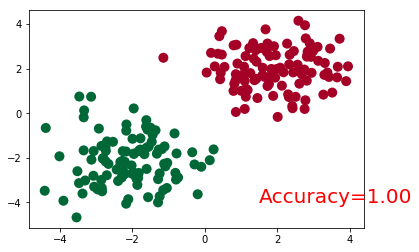

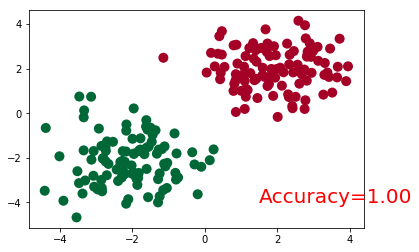

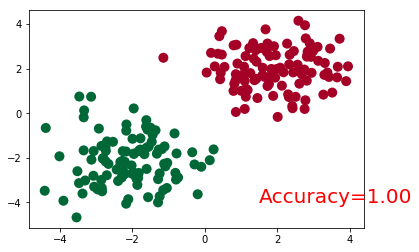

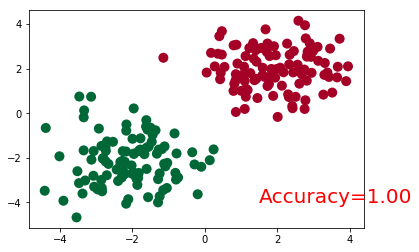

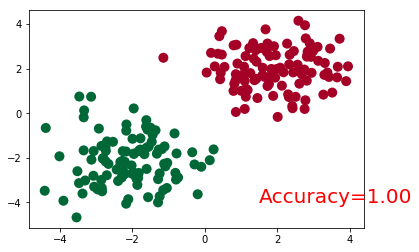

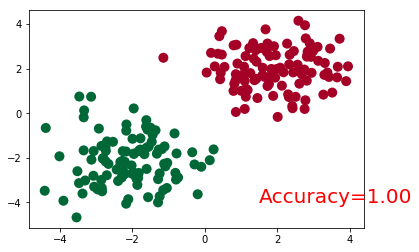

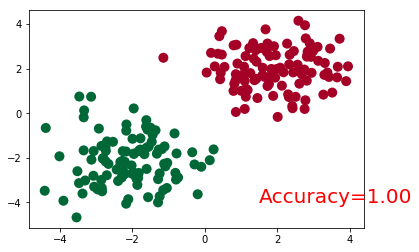

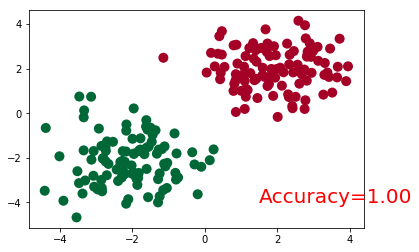

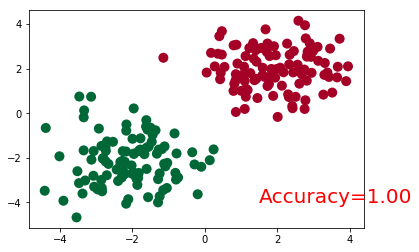

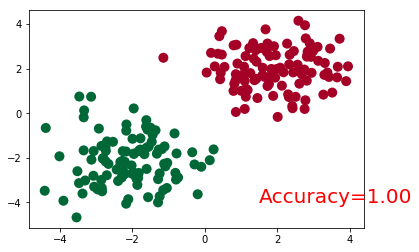

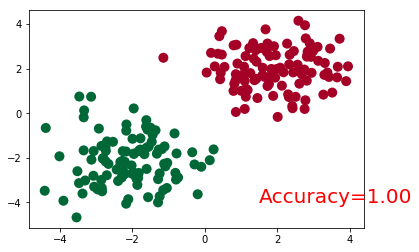

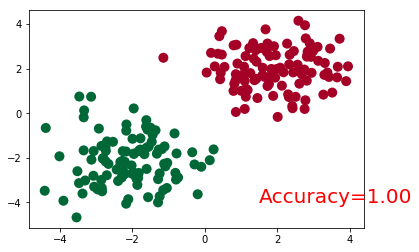

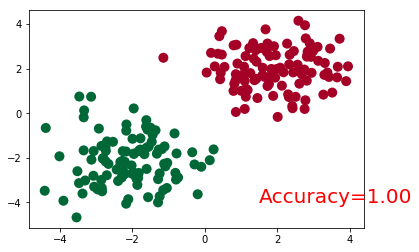

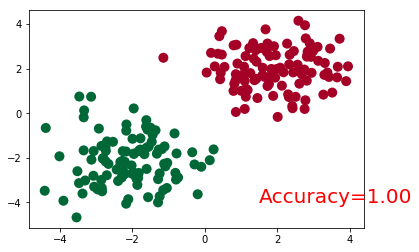

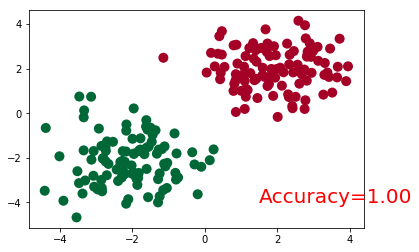

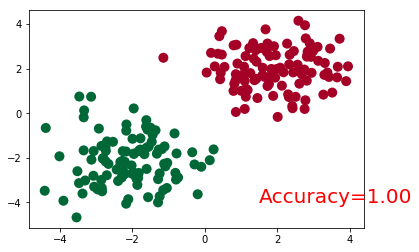

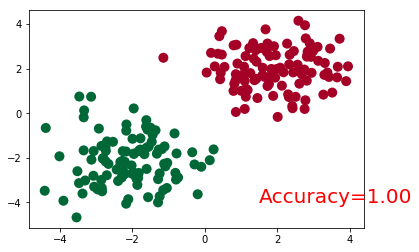

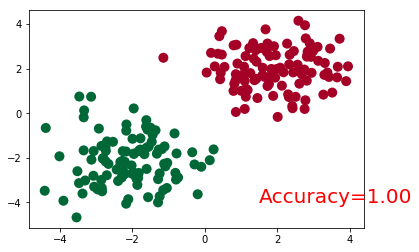

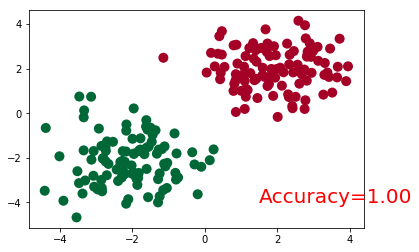

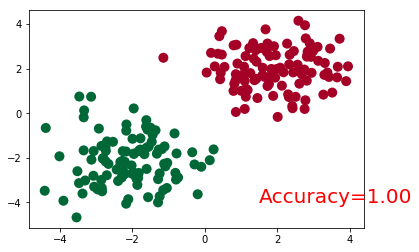

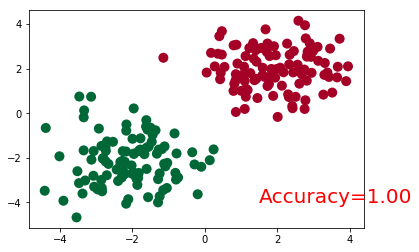

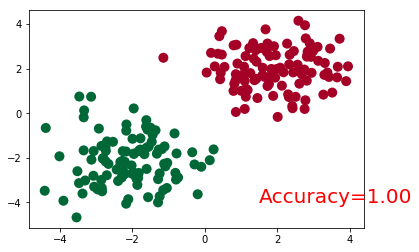

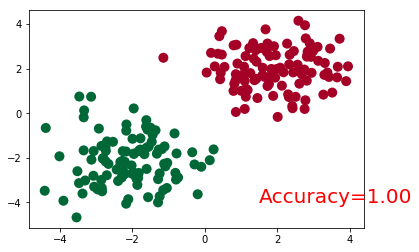

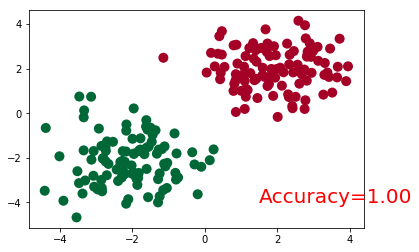

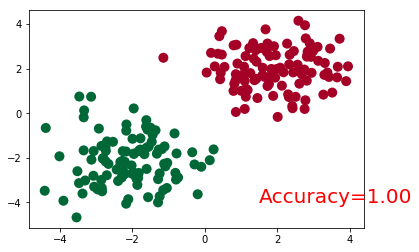

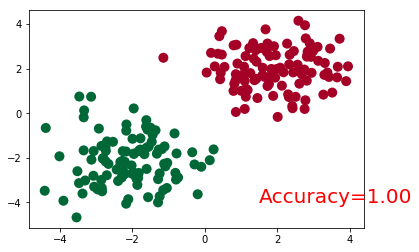

In [131]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.out = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.out(x)
        return x

net = Net(n_feature=2, n_hidden=10, n_output=2)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()  # the target label is NOT an one-hotted

plt.ion()   # something about plotting

for t in range(100):
    out = net(x)                 # input x and predict based on x
    loss = loss_func(out, y)     # must be (1. nn output, 2. target), the target label is NOT one-hotted

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 2 == 0:
        # plot and show learning process
        plt.cla()
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()

------------